**READ THE COMBINED AND PREPROCESSED DATASET**

In [2]:
import pandas as pd
final_data = pd.read_csv("complete_merged_data.csv")

**FOLLWING A FEW SAME STEPS TO PERFORM MODELING**

In [3]:
categorical_columns = ['superregion', 'country', 'type_desc', 'Dietary Factor']
for col in categorical_columns:
    final_data[col] = final_data[col].astype('category')

final_data.dtypes

superregion       category
country           category
age                float64
gender               int64
region               int64
education            int64
year                 int64
type                 int64
type_desc         category
median             float64
upperci_95         float64
lowerci_95         float64
Dietary Factor    category
dtype: object

In [6]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  
        Q3 = df[col].quantile(0.75)  
        IQR = Q3 - Q1  
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = final_data[(final_data[col] >= lower_bound) & (final_data[col] <= upper_bound)]
    return df

numeric_columns = ['age', 'median', 'upperci_95', 'lowerci_95']
data_no_outliers = remove_outliers(final_data, numeric_columns)

data_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1111058 entries, 0 to 1442559
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype   
---  ------          --------------    -----   
 0   superregion     1111058 non-null  category
 1   country         1111058 non-null  category
 2   age             1111058 non-null  float64 
 3   gender          1111058 non-null  int64   
 4   region          1111058 non-null  int64   
 5   education       1111058 non-null  int64   
 6   year            1111058 non-null  int64   
 7   type            1111058 non-null  int64   
 8   type_desc       1111058 non-null  category
 9   median          1111058 non-null  float64 
 10  upperci_95      1111058 non-null  float64 
 11  lowerci_95      1111058 non-null  float64 
 12  Dietary Factor  1111058 non-null  category
dtypes: category(4), float64(4), int64(5)
memory usage: 90.1 MB


In [8]:
if 'type' in data_no_outliers .columns:
    target_column = 'type'
    min_class_count = data_no_outliers [target_column].value_counts().min()
    reduced_data = data_no_outliers .groupby(target_column, group_keys=False).apply(
        lambda x: x.sample(min_class_count, random_state=42)
    )
else:
    reduced_data = data_no_outliers .sample(frac=0.1, random_state=42)
reduced_data_size = reduced_data.shape
reduced_data_head = reduced_data.head()
reduced_data_size, reduced_data_head

/var/folders/_z/h67thp7x5xb1hb1cj47l66tr0000gn/T/ipykernel_1834/2189125348.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  reduced_data = data_no_outliers .groupby(target_column, group_keys=False).apply(


((648339, 13),
        superregion country   age  gender  region  education  year  type  \
 442460         LAC     SUR  27.5       1       1          1  2015     1   
 334701       SAARC     BGD  22.5       1       1          2  2018     1   
 86028          FSU     HRV  12.5       1       1          1  2010     1   
 116129         FSU     TJK  42.5       0       0          2  2015     1   
 148083         FSU     HRV  17.5       0       0        999  2018     1   
 
                    type_desc     median  upperci_95  lowerci_95  \
 442460  1: Foods & Beverages  21.253535  111.145690    4.277193   
 334701  1: Foods & Beverages  25.748644   42.851756   15.528663   
 86028   1: Foods & Beverages  69.384521   81.228329   59.921950   
 116129  1: Foods & Beverages  88.700056  116.808990   67.114323   
 148083  1: Foods & Beverages  47.723369  142.752410   12.212617   
 
                 Dietary Factor  
 442460            Whole grains  
 334701          Refined grains  
 86028   Non-st

In [10]:
reduction_fraction = 0.2  
further_reduced_data = reduced_data.sample(frac=reduction_fraction, random_state=42)
further_reduced_data_size = further_reduced_data.shape
further_reduced_data_head = further_reduced_data.head()
further_reduced_data_size, further_reduced_data_head

((129668, 13),
         superregion country   age  gender  region  education  year  type  \
 920071          LAC     CRI  42.5       0       1        999  2015     2   
 52115           SSA     SWZ  22.5       0       0        999  2010     1   
 726203         Asia     IDN  42.5       1       0        999  2018     2   
 328615         MENA     YEM  12.5       0       1        999  2018     1   
 1230208         LAC     TTO  12.5       0       0          1  2015     3   
 
                     type_desc      median  upperci_95  lowerci_95  \
 920071      2: Macronutrients   22.551900   42.878510   12.221095   
 52115    1: Foods & Beverages  103.954082  119.627804   90.705760   
 726203      2: Macronutrients   17.129215   18.684971   15.657119   
 328615   1: Foods & Beverages   12.299194   15.636972    9.666412   
 1230208     3: Micronutrients   96.669384  180.868476   52.428340   
 
          Dietary Factor  
 920071    Dietary fiber  
 52115            Fruits  
 726203           

In [9]:
for column in further_reduced_data.columns:
    print(f"Column: {column}")
    print(f"Unique Values ({len(further_reduced_data[column].unique())}):")
    print(further_reduced_data[column].unique(), "\n")

Column: superregion
Unique Values (7):
['LAC', 'SSA', 'Asia', 'MENA', 'HIC', 'FSU', 'SAARC']
Categories (7, object): ['Asia', 'FSU', 'HIC', 'LAC', 'MENA', 'SAARC', 'SSA'] 

Column: country
Unique Values (185):
['CRI', 'SWZ', 'IDN', 'YEM', 'TTO', ..., 'IRQ', 'CAF', 'NAM', 'NOR', 'ECU']
Length: 185
Categories (185, object): ['AFG', 'AGO', 'ALB', 'ARE', ..., 'YEM', 'ZAF', 'ZMB', 'ZWE'] 

Column: age
Unique Values (7):
[42.5 22.5 12.5 37.5 17.5 27.5 32.5] 

Column: gender
Unique Values (2):
[0 1] 

Column: region
Unique Values (2):
[1 0] 

Column: education
Unique Values (4):
[999   1   2   3] 

Column: year
Unique Values (4):
[2015 2010 2018 2020] 

Column: type
Unique Values (3):
[2 1 3] 

Column: type_desc
Unique Values (3):
['2: Macronutrients', '1: Foods & Beverages', '3: Micronutrients']
Categories (3, object): ['1: Foods & Beverages', '2: Macronutrients', '3: Micronutrients'] 

Column: median
Unique Values (129254):
[ 22.55189992 103.95408207  17.12921538 ...  83.43356043 102.428430

In [10]:
further_reduced_data.head()

,superregion,country,age,gender,region,education,year,type,type_desc,median,upperci_95,lowerci_95,Dietary Factor
920071,LAC,CRI,42.5,0,1,999,2015,2,2: Macronutrients,22.551900,42.878510,12.221095,Dietary fiber
52115,SSA,SWZ,22.5,0,0,999,2010,1,1: Foods & Beverages,103.954082,119.627804,90.705760,Fruits
726203,Asia,IDN,42.5,1,0,999,2018,2,2: Macronutrients,17.129215,18.684971,15.657119,Cheese
328615,MENA,YEM,12.5,0,1,999,2018,1,1: Foods & Beverages,12.299194,15.636972,9.666412,Nuts and seeds
1230208,LAC,TTO,12.5,0,0,1,2015,3,3: Micronutrients,96.669384,180.868476,52.428340,Magnesium


**CONVERTING IT TO CSV FILE TO SAVE THE DATASET**

In [11]:
further_reduced_data.to_csv('further_reduced_data.csv', index=False)

In [12]:
further_reduced_data.shape

(129668, 13)

**RIDGE AND LASSO REGRESSION MODEL**

                 Metric
Ridge MAE     42.749012
Ridge MSE   4480.849448
Ridge RMSE    66.939147
Ridge R²       0.003484
Lasso MAE     42.748990
Lasso MSE   4480.897502
Lasso RMSE    66.939506
Lasso R²       0.003473


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


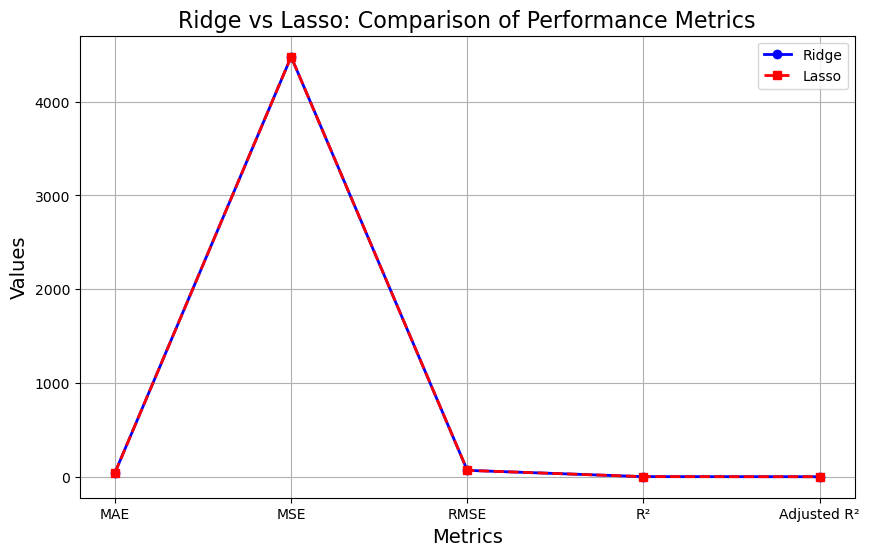

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = further_reduced_data[['age', 'gender', 'education', 'year']]  
y = further_reduced_data[['median']] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = Ridge()
lasso = Lasso()

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]  # Expanded grid of alpha values
}

ridge_grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

ridge_grid_search.fit(X_train_scaled, y_train)
lasso_grid_search.fit(X_train_scaled, y_train)

best_ridge = ridge_grid_search.best_estimator_
best_lasso = lasso_grid_search.best_estimator_

ridge_pred = best_ridge.predict(X_test_scaled)
lasso_pred = best_lasso.predict(X_test_scaled)

metrics = {
    'Ridge MAE': mean_absolute_error(y_test, ridge_pred),
    'Ridge MSE': mean_squared_error(y_test, ridge_pred),
    'Ridge RMSE': mean_squared_error(y_test, ridge_pred, squared=False),
    'Ridge R²': r2_score(y_test, ridge_pred),
    
    'Lasso MAE': mean_absolute_error(y_test, lasso_pred),
    'Lasso MSE': mean_squared_error(y_test, lasso_pred),
    'Lasso RMSE': mean_squared_error(y_test, lasso_pred, squared=False),
    'Lasso R²': r2_score(y_test, lasso_pred)
}

metrics_df = pd.DataFrame(metrics, index=['Metric'])
print(metrics_df.T)

def adjusted_r2(r2, n, p):
    """
    Calculate Adjusted R²: 
    r2 - (1 - r2) * (n - 1) / (n - p - 1)
    where:
    r2: R² value
    n: Number of observations
    p: Number of predictors (features)
    """
    return r2 - (1 - r2) * (n - 1) / (n - p - 1)

n = X_test.shape[0]
p = X_test.shape[1]

ridge_adj_r2 = adjusted_r2(r2_score(y_test, ridge_pred), n, p)
lasso_adj_r2 = adjusted_r2(r2_score(y_test, lasso_pred), n, p)

metric_labels = ['MAE', 'MSE', 'RMSE', 'R²', 'Adjusted R²']
ridge_values = [
    metrics['Ridge MAE'],
    metrics['Ridge MSE'],
    metrics['Ridge RMSE'],
    metrics['Ridge R²'],
    ridge_adj_r2
]
lasso_values = [
    metrics['Lasso MAE'],
    metrics['Lasso MSE'],
    metrics['Lasso RMSE'],
    metrics['Lasso R²'],
    lasso_adj_r2
]

plt.figure(figsize=(10, 6))

plt.plot(metric_labels, ridge_values, marker='o', color='blue', label='Ridge', linestyle='-', linewidth=2)
plt.plot(metric_labels, lasso_values, marker='s', color='red', label='Lasso', linestyle='--', linewidth=2)

plt.title('Ridge vs Lasso: Comparison of Performance Metrics', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Values', fontsize=14)

plt.legend()

plt.grid(True)
plt.show()

**KNN REGRESSION MODEL**

Best Hyperparameters: {'n_neighbors': 21, 'p': 1, 'weights': 'uniform'}
               Metric
KNN MAE     44.396880
KNN MSE   4664.401932
KNN RMSE    68.296427
KNN R²      -0.037337


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


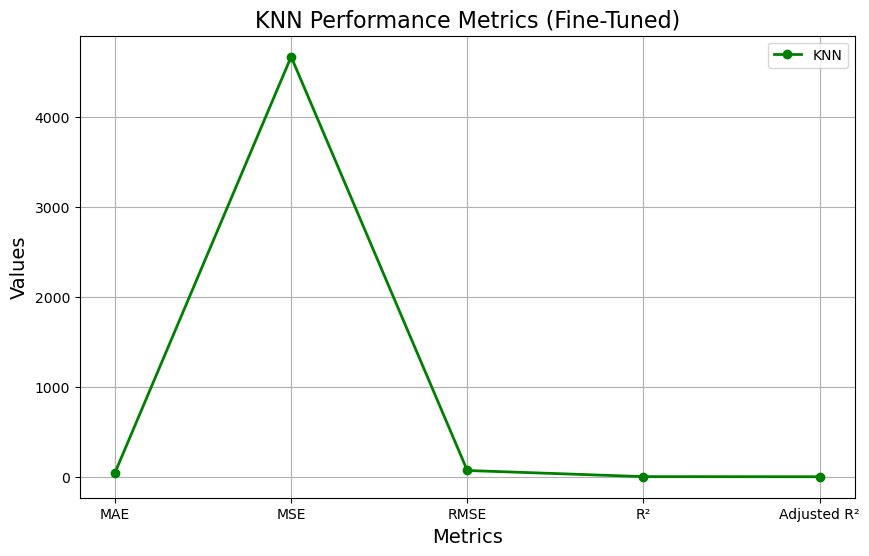

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = further_reduced_data[['age', 'gender', 'education', 'year']]  
y = further_reduced_data[['median']] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 21],  
    'weights': ['uniform', 'distance'],      
    'p': [1, 2]                             
}

knn_grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

knn_grid_search.fit(X_train_scaled, y_train)

best_knn = knn_grid_search.best_estimator_

print(f"Best Hyperparameters: {knn_grid_search.best_params_}")

knn_pred = best_knn.predict(X_test_scaled)

metrics = {
    'KNN MAE': mean_absolute_error(y_test, knn_pred),
    'KNN MSE': mean_squared_error(y_test, knn_pred),
    'KNN RMSE': mean_squared_error(y_test, knn_pred, squared=False),
    'KNN R²': r2_score(y_test, knn_pred)
}

metrics_df = pd.DataFrame(metrics, index=['Metric'])
print(metrics_df.T)

def adjusted_r2(r2, n, p):
    """
    Calculate Adjusted R²: 
    r2 - (1 - r2) * (n - 1) / (n - p - 1)
    where:
    r2: R² value
    n: Number of observations
    p: Number of predictors (features)
    """
    return r2 - (1 - r2) * (n - 1) / (n - p - 1)

n = X_test.shape[0]
p = X_test.shape[1]

knn_adj_r2 = adjusted_r2(r2_score(y_test, knn_pred), n, p)

metric_labels = ['MAE', 'MSE', 'RMSE', 'R²', 'Adjusted R²']
knn_values = [
    metrics['KNN MAE'],
    metrics['KNN MSE'],
    metrics['KNN RMSE'],
    metrics['KNN R²'],
    knn_adj_r2
]

plt.figure(figsize=(10, 6))

plt.plot(metric_labels, knn_values, marker='o', color='green', label='KNN', linestyle='-', linewidth=2)

plt.title('KNN Performance Metrics (Fine-Tuned)', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Values', fontsize=14)

plt.legend()

plt.grid(True)
plt.show()

**RANDOM FOREST REGRESSION MODEL**

Random Forest Performance Metrics:
Mean Absolute Error (MAE): 42.71
Mean Squared Error (MSE): 4483.14
Root Mean Squared Error (RMSE): 66.96
R² Score: 0.0030


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


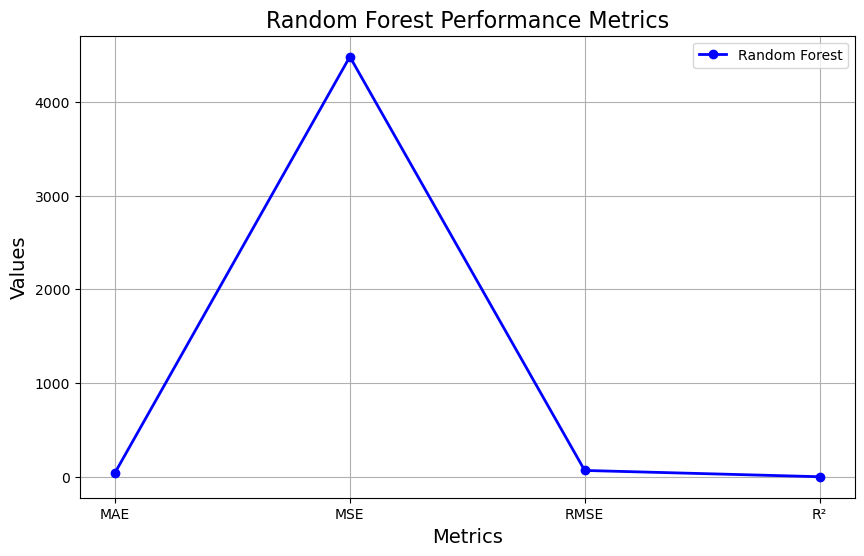

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = further_reduced_data[['age', 'gender', 'education', 'year']]  
y = further_reduced_data['median']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

random_forest = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=2, random_state=42)

random_forest.fit(X_train_scaled, y_train)

rf_pred = random_forest.predict(X_test_scaled)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Performance Metrics:")
print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.2f}")
print(f"R² Score: {rf_r2:.4f}")

metric_labels = ['MAE', 'MSE', 'RMSE', 'R²']
rf_values = [rf_mae, rf_mse, rf_rmse, rf_r2]

plt.figure(figsize=(10, 6))
plt.plot(metric_labels, rf_values, marker='o', color='blue', label='Random Forest', linestyle='-', linewidth=2)
plt.title('Random Forest Performance Metrics', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

**XGBOOST MODEL**

In [36]:
!pip install xgboost

XGBoost Performance Metrics:
Mean Absolute Error (MAE): 42.67
Mean Squared Error (MSE): 4476.11
Root Mean Squared Error (RMSE): 66.90
R² Score: 0.0045


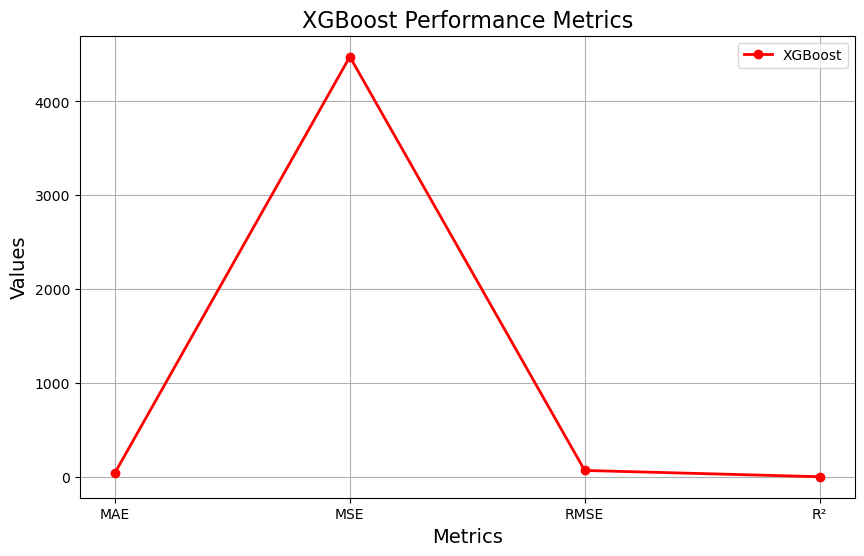

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = further_reduced_data[['age', 'gender', 'education', 'year']] 
y = further_reduced_data['median'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

xgb_model.fit(X_train_scaled, y_train)

xgb_predictions = xgb_model.predict(X_test_scaled)

xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)  
xgb_r2 = r2_score(y_test, xgb_predictions)

print("XGBoost Performance Metrics:")
print(f"Mean Absolute Error (MAE): {xgb_mae:.2f}")
print(f"Mean Squared Error (MSE): {xgb_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {xgb_rmse:.2f}")
print(f"R² Score: {xgb_r2:.4f}")

metric_labels = ['MAE', 'MSE', 'RMSE', 'R²']
xgb_values = [xgb_mae, xgb_mse, xgb_rmse, xgb_r2]

plt.figure(figsize=(10, 6))
plt.plot(metric_labels, xgb_values, marker='o', color='red', label='XGBoost', linestyle='-', linewidth=2)
plt.title('XGBoost Performance Metrics', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

**BAYESIAN REGRESSION MODEL**

Lambda_1: 1e-06
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.11
R² Score: 1.0000
------------------------------
Lambda_1: 0.0001
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.11
R² Score: 1.0000
------------------------------
Lambda_1: 0.01
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.11
R² Score: 1.0000
------------------------------
Lambda_1: 1
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.11
R² Score: 1.0000
------------------------------
Lambda_1: 10
Mean Squared Error (MSE): 38747.24
Root Mean Squared Error (RMSE): 196.84
R² Score: -0.0010
------------------------------


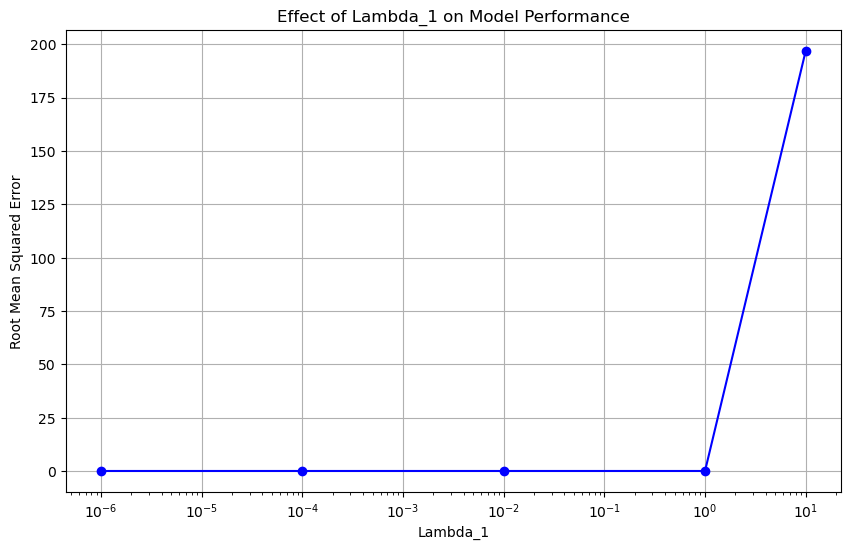

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lambda_1_values = [1e-6, 1e-4, 1e-2, 1, 10]

performance_metrics = []

for lambda_1 in lambda_1_values:
    bayesian_model = BayesianRidge(lambda_1=lambda_1)

    bayesian_model.fit(X_train, y_train)
    
    y_pred = bayesian_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  
    r2 = r2_score(y_test, y_pred)

    performance_metrics.append((lambda_1, mse, rmse, r2))

for lambda_1, mse, rmse, r2 in performance_metrics:
    print(f"Lambda_1: {lambda_1}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R² Score: {r2:.4f}")
    print("-" * 30)

rmse_values = [x[2] for x in performance_metrics]
plt.figure(figsize=(10, 6))
plt.plot(lambda_1_values, rmse_values, marker='o', linestyle='-', color='blue')
plt.xscale('log')  
plt.xlabel('Lambda_1')
plt.ylabel('Root Mean Squared Error')
plt.title('Effect of Lambda_1 on Model Performance')
plt.grid(True)
plt.show()
